# Exercise 1 computer assignments

Fill in the parts labeled **your solution here** and replace *...* with your code. You *do not* need to strictly follow the template, but you may lose points if you do not provide the required results.

## 1 Basic definitions

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#### (a)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class Net(nn.Module):
    def __init__(self, foo) -> None: 
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(5, 5),
            foo,
            nn.Linear(5, 5),
            foo,
            nn.Linear(5, 5),
            foo            
        )
    
    def forward(self, x) -> torch.tensor:
        return self.layers(x)
    
tanhnet = Net(nn.Tanh()).to(device)
relunet = Net(nn.ReLU()).to(device)
linearnet = Net(nn.Identity()).to(device)

In [22]:
torch.manual_seed(1)

x = torch.randn(5, device=device)
#print(tanhnet(x))
#print(relunet(x))
#print(linearnet(x))

print(tanhnet)

for param in tanhnet.parameters():
    print(param)
    print()



Net(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=5, bias=True)
    (1): Tanh()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): Tanh()
    (4): Linear(in_features=5, out_features=5, bias=True)
    (5): Tanh()
  )
)
Parameter containing:
tensor([[ 0.4150,  0.0326, -0.4365, -0.1716,  0.2222],
        [-0.3711,  0.0825,  0.3143,  0.0620,  0.3703],
        [-0.0847, -0.1224, -0.2912,  0.2823,  0.3216],
        [-0.0175,  0.2605, -0.1468, -0.0284,  0.3814],
        [-0.0600, -0.0173, -0.2102, -0.3582, -0.2514]], device='cuda:0',
       requires_grad=True)

Parameter containing:
tensor([ 0.1481,  0.3361, -0.0583, -0.2993,  0.1233], device='cuda:0',
       requires_grad=True)

Parameter containing:
tensor([[ 0.4459, -0.2415,  0.0794, -0.2868,  0.4291],
        [-0.3245, -0.3735,  0.2466, -0.1649,  0.0694],
        [ 0.3915, -0.0749, -0.1860, -0.1500,  0.1709],
        [ 0.3364,  0.2691,  0.3941,  0.0515, -0.4133],
        [ 0.0153, -0.3496,  0.0206,  

#### (b)

In [ ]:
...

# Code for reporting the 9 plots:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i in range(3): # loop over rows of plot
    ...
    for j in range(3): # loop over cols of plot
        ...
        axs[i, j].plot(...)
        axs[i, j].set_title(...)
        axs[i, j].set_xlabel('x1')
        axs[i, j].set_ylabel('y1')
plt.tight_layout()
plt.show()

## 2 Optimization

### 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

np.random.seed(1)

#### (a)

In [6]:
def f(w):
    return np.exp(-w[0]**2 - 2*(w[1] - 1)**2) + np.exp(-(w[0] - 1)**2 - 2*w[1]**2)

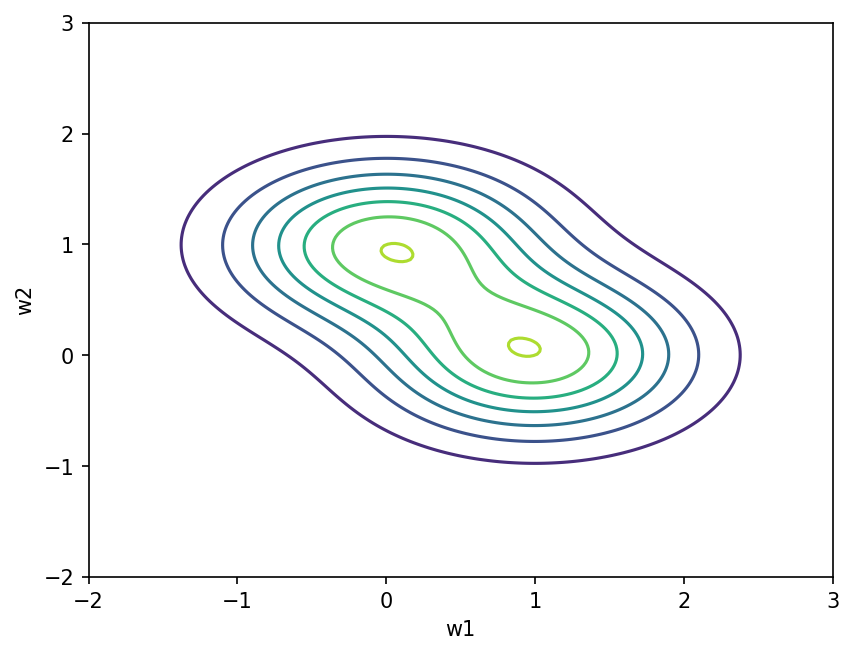

In [7]:

# Code for plotting isocontours of the function f
vec_f = np.vectorize(f, signature="(n)->()")
w1 = np.linspace(-2.0, 3.0, 200)
w2 = np.linspace(-2.0, 3.0, 200)
W1, W2 = np.meshgrid(w1, w2)
Fs = vec_f(np.stack((W1, W2), axis=2))
plt.figure(dpi=150)
plt.contour(W1, W2, Fs)
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

#### (b)

$$
\begin{align*}
f(\textbf{w})&=\exp (-w_1^2 - 2(w_2 - 1)^2) + \exp (-(w_1-1)^2-2w_2) \\
&= \exp (-w_1^2 - 2w_2^2 + 4w_2 -2) + \exp (-w_1^2+2w_1-2w_2^2-1) 
\end{align*}
$$

The gradient is then
$$
\begin{align*}
\nabla f &=\frac{\partial f}{\partial w_1} \textbf{i} + \frac{\partial f}{\partial w_2} \textbf{j} \\
&= \left[ -2w_1 \exp (-w_1^2 -2w_2^2 + 4w_2 -2 ) + (2 - 2w_1) \exp (-w_1^2 + 2w_1 -2w_2^2 -1) \right] \textbf{i} \\
&+ \left[ (4 -4w_2)\exp (-w_1^2 -2w_2^2 + 4w_2 -2 ) - 4 \exp (-w_1^2 + 2w_1 -2w_2^2 -1) \right] \textbf{j}
\end{align*}
$$

#### (c)

In [ ]:
w1 = np.asarray([0.2, 0.5])
w2 = np.asarray([0.5, 0.2])
w3 = np.asarray([1.0, 1.0])

...

#### (d)

In [ ]:
...

# Code for plotting.
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=150)
for ... in enumerate([w1, w2, w3]):
    ...
    ax = axes[i]
    ax.contour(W1, W2, Fs)
    ax.plot(..., ..., marker="o", color="blue", label="Initial")
    for i in ...:
        ax.arrow(..., ..., ..., ..., length_includes_head=True, width=0.03)
    ax.plot(..., ..., marker="o", color="red", label="Final")
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.legend()
    ...
plt.show()

#### (e)

In [ ]:
# Code for plotting.
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, ... in enumerate(...):
    axs[i].plot(...)
    axs[i].set_xlabel("Number of iterations")
    axs[i].set_ylabel("Function value")
plt.show()

#### (f)

**your solution here**